# Bagging

**Note:** We will be using the customer churn data from the telecom industry that we used in the KNN notebook. Since we preprocessed the data there, we will import the preprocessed data, which is in a file called: 'churndata_processed.csv'

# Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [3]:
ds = pd.read_csv('churndata_processed.csv')

In [4]:
ds.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0


In [6]:
ds.isnull().sum().value_counts()

0    23
dtype: int64

In [9]:
ds.shape

(7043, 23)

In [11]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
months,7043.0,0.433551,0.398231,0.0,0.000000,0.250000,0.750000,1.0
multiple,7043.0,0.421837,0.493888,0.0,0.000000,0.000000,1.000000,1.0
gb_mon,7043.0,0.241358,0.240223,0.0,0.035294,0.200000,0.317647,1.0
security,7043.0,0.286668,0.452237,0.0,0.000000,0.000000,1.000000,1.0
backup,7043.0,0.344881,0.475363,0.0,0.000000,0.000000,1.000000,1.0
protection,7043.0,0.343888,0.475038,0.0,0.000000,0.000000,1.000000,1.0
support,7043.0,0.290217,0.453895,0.0,0.000000,0.000000,1.000000,1.0
unlimited,7043.0,0.673719,0.468885,0.0,0.000000,1.000000,1.000000,1.0
contract,7043.0,0.377396,0.424234,0.0,0.000000,0.000000,1.000000,1.0
paperless,7043.0,0.592219,0.491457,0.0,0.000000,1.000000,1.000000,1.0


In [16]:
ds.dtypes.value_counts()

int64      18
float64     5
dtype: int64

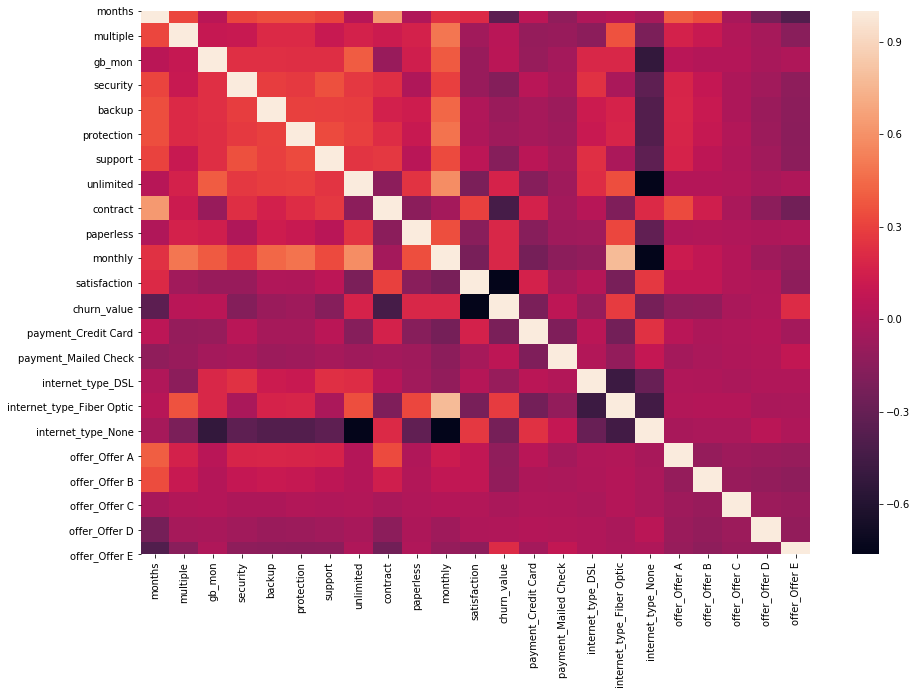

In [18]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(ds.corr())

# Examining the Distribution of the Predicted Variable

In [21]:
# Data are skewed at ~85% towards non-churned customers
# This will be important to remember when model building
target = 'churn_value'
ds[target].value_counts()

0    5174
1    1869
Name: churn_value, dtype: int64

In [23]:
# We observe the proportions as a % using normalize = True
ds[target].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: churn_value, dtype: float64

**Note:** Given the skew in the predictor variable, let's split the data with the churned values being stratified.

# Splitting the Dataset into the Training Set and Test Set

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

feature_cols = [x for x in ds.columns if x != target]

# Split the data into two parts with 1500 points in the test data
# This creates a generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=1500, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(ds[feature_cols], ds[target]))

# Create the data sets
X_train = ds.loc[train_idx, feature_cols]
y_train = ds.loc[train_idx, target]

X_test = ds.loc[test_idx, feature_cols]
y_test = ds.loc[test_idx, target]

In [29]:
y_train.value_counts(normalize=True)

0    0.73462
1    0.26538
Name: churn_value, dtype: float64

In [31]:
# We observe that we have maintained the same proportions for the
# training and test set.

y_test.value_counts(normalize=True)

0    0.734667
1    0.265333
Name: churn_value, dtype: float64

# Fitting the Random Forest to the Dataset and Out-Of-Bag Error

**Note:** Since the only thing changing is the number of trees, the `warm_start` flag can be used so that the model just adds more trees to the existing model each time. Use the `set_params` method to update the number of trees.

In [32]:
# Suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Initialise the random forest estimator
# Note: that the number of trees is not setup here

RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.055566
20.0,0.052138
30.0,0.049973
40.0,0.048890
50.0,0.049071
100.0,0.047447
150.0,0.046726
200.0,0.047447
300.0,0.047988


From the above, we observe that the error stabilises around 100-150 trees.

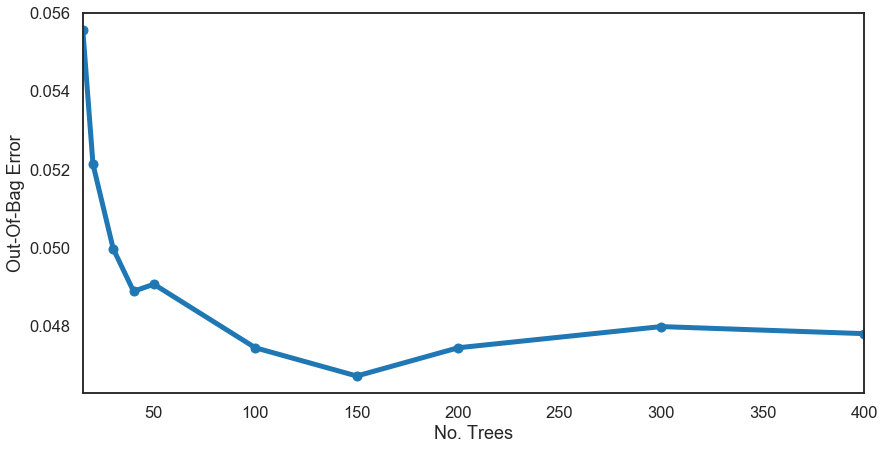

In [37]:
%matplotlib inline
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='Out-Of-Bag Error', xlabel = 'No. Trees');

# Fitting the Extra Trees Classifier to the Dataset

We will no be using the extra randomized trees (`ExtraTreesClassifier`). Note that the `bootstrap` parameter will have to be set to `True` for this model. Let's compare the out-of-bag errors for the two different types of models.

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialise the random forest estimator
# Note that the number of trees is not setup here

EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
15.0,0.066570
20.0,0.063864
30.0,0.057550
40.0,0.053942
50.0,0.052318
100.0,0.051236
150.0,0.048890
200.0,0.048530
300.0,0.049612


In [39]:
# Combine the two dataframes into a single one for easier plotting.

oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.055566,0.066570
20.0,0.052138,0.063864
30.0,0.049973,0.057550
40.0,0.048890,0.053942
50.0,0.049071,0.052318
100.0,0.047447,0.051236
150.0,0.046726,0.048890
200.0,0.047447,0.048530
300.0,0.047988,0.049612


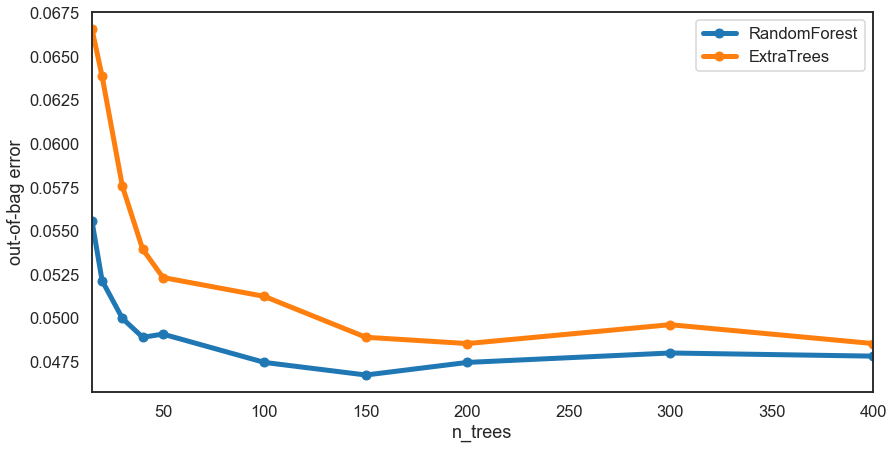

In [40]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

# Results

In [43]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

# Get the probabilities for each of the two categories.
# This will be useful for calculating ROC AUC.
y_prob = model.predict_proba(X_test)

In [44]:
y_prob

array([[0.035 , 0.965 ],
       [1.    , 0.    ],
       [0.655 , 0.345 ],
       ...,
       [0.0525, 0.9475],
       [0.97  , 0.03  ],
       [0.9825, 0.0175]])

In [46]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1102
           1       0.94      0.83      0.88       398

    accuracy                           0.94      1500
   macro avg       0.94      0.90      0.92      1500
weighted avg       0.94      0.94      0.94      1500

   accuracy  precision    recall    f1       auc
0      0.94     0.9375  0.829146  0.88  0.904591


Unsurprisingly, recall is rather poor for the customers who churned (True) class since they are quite small. We are doing better than random guessing, though, as the accuracy is 0.96 (vs 0.85 for random guessing).

# Examining the Results

Next steps:
- Print or visualize the confusion matrix.
- Plot the ROC-AUC and precision-recall curves.
- Plot the feature importances.

In [50]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1080   22]
 [  68  330]]


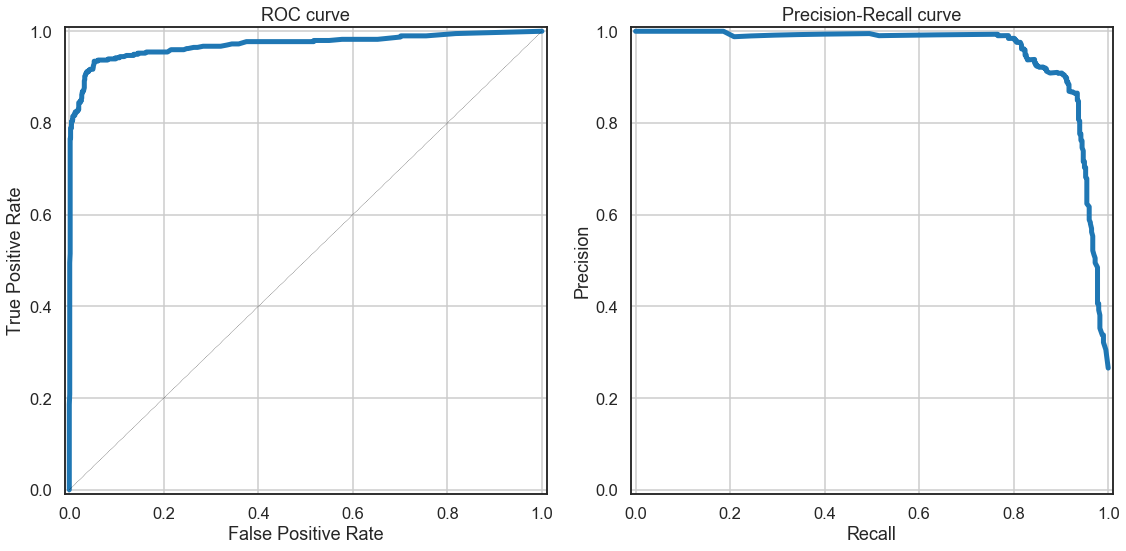

In [53]:
# The ROC-AUC and precision-recall curves.

sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = model.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

The feature importances. Total daily cost is the biggest predictor of customer churn.

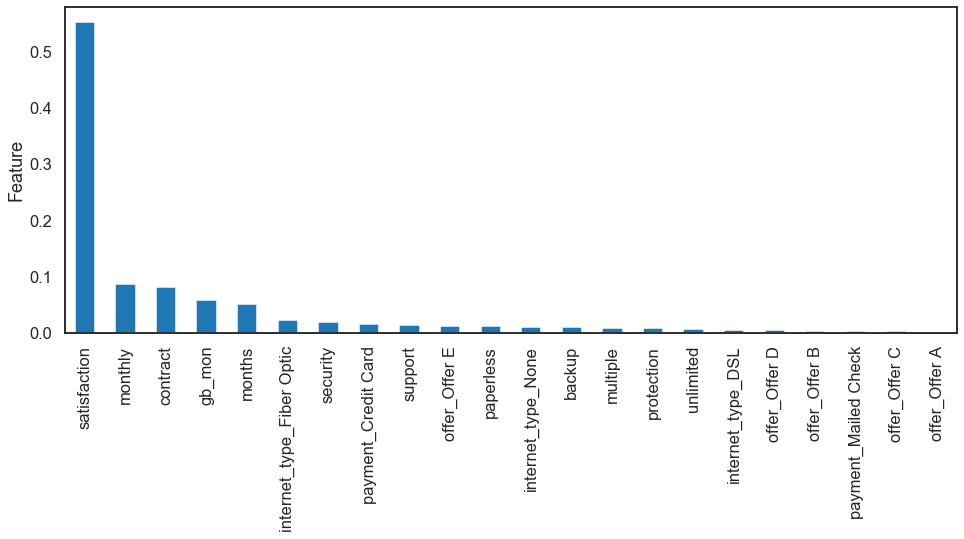

In [54]:
feature_imp = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(ylabel='Feature');